In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

## Data import

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
x = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

In [3]:
# metadata 
banknote_authentication.metadata

{'uci_id': 267,
 'name': 'Banknote Authentication',
 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication',
 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv',
 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.',
 'area': 'Computer Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 1372,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2012,
 'last_updated': 'Fri Feb 16 2024',
 'dataset_doi': '10.24432/C55P57',
 'creators': ['Volker Lohweg'],
 'intro_paper': None,
 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection w

In [4]:
# variable information 
banknote_authentication.variables

,name,role,type,demographic,description,units,missing_values
0,variance,Feature,Continuous,None,variance of Wavelet Transformed image,None,no
1,skewness,Feature,Continuous,None,skewness of Wavelet Transformed image,None,no
2,curtosis,Feature,Continuous,None,curtosis of Wavelet Transformed image,None,no
3,entropy,Feature,Continuous,None,entropy of image,None,no
4,class,Target,Integer,None,None,None,no


## Data exploration

In [5]:
df = pd.concat([x, y], axis=1)
df.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [6]:
df.tail(10)

,variance,skewness,curtosis,entropy,class
1362,-2.16680,1.59330,0.045122,-1.67800,1
1363,-1.16670,-1.42370,2.924100,0.66119,1
1364,-2.83910,-6.63000,10.484900,-0.42113,1
1365,-4.50460,-5.81260,10.886700,-0.52846,1
1366,-2.41000,3.74330,-0.402150,-1.29530,1
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,17.593200,-2.77710,1
1370,-3.56370,-8.38270,12.393000,-1.28230,1
1371,-2.54190,-0.65804,2.684200,1.19520,1


**note: data is sorted by class**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [9]:
df["class"].value_counts()

class
0    762
1    610
Name: count, dtype: int64

**note: data is nearly balanced**

In [10]:
#shape of data
df.shape

(1372, 5)

In [11]:
#number of duplicates
df.duplicated().sum()

np.int64(24)

In [12]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [13]:
#make sure duplicates have removed successfully
df.duplicated().sum()

np.int64(0)

In [14]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [15]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

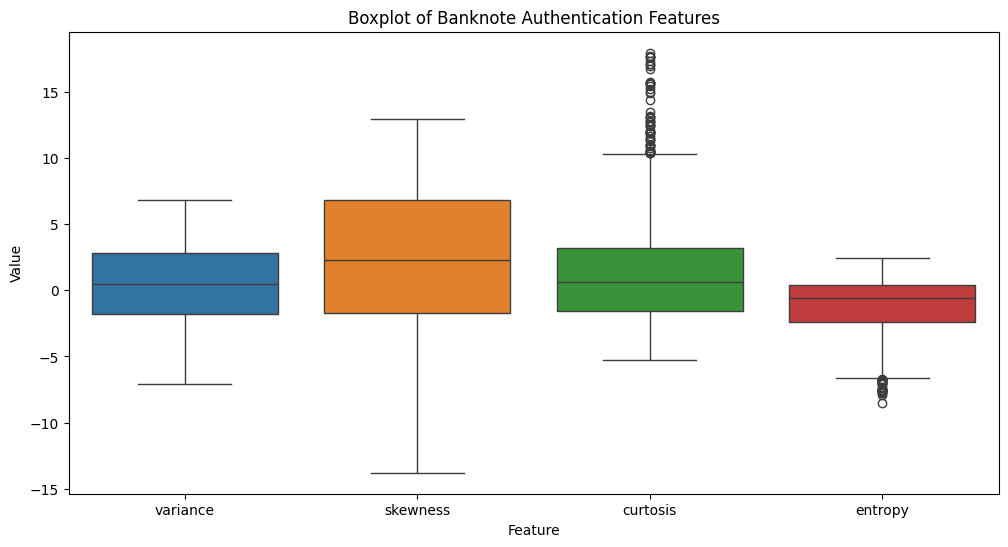

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.boxplot(data=x)
plt.title("Boxplot of Banknote Authentication Features")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()

In [17]:
# IQR-based outlier removal
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows where all features are within bounds
filtered_data = df[~((x < lower_bound) | (x > upper_bound)).any(axis=1)]

# Separate back into x and y
x_clean = filtered_data[x.columns]
y_clean = filtered_data[y.columns[0]]

print(f"Original data shape: {x.shape}")
print(f"Cleaned data shape: {x_clean.shape}")

Original data shape: (1372, 4)
Cleaned data shape: (1259, 4)


C:\Users\Shahd\AppData\Local\Temp\ipykernel_20956\2915159160.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = df[~((x < lower_bound) | (x > upper_bound)).any(axis=1)]


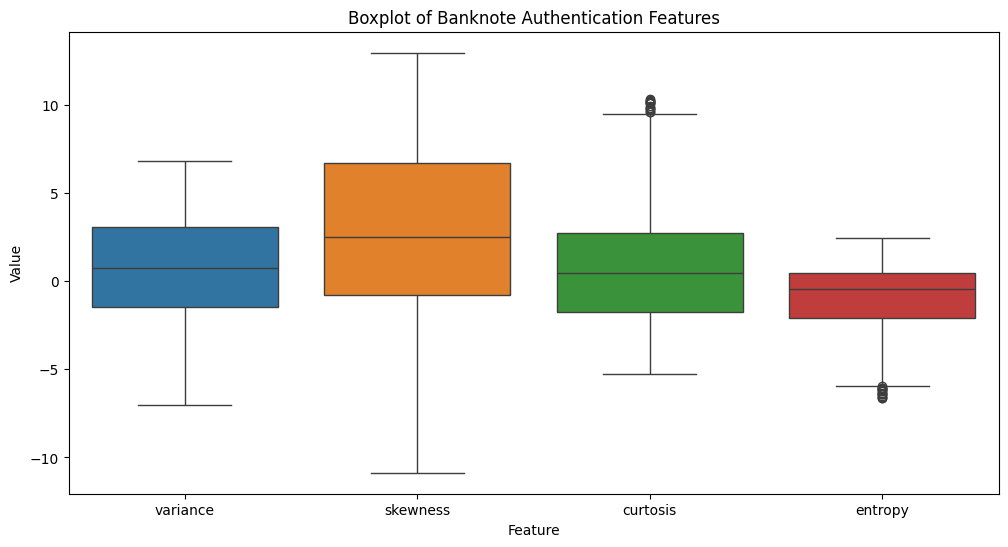

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.boxplot(data=x_clean)
plt.title("Boxplot of Banknote Authentication Features")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.show()



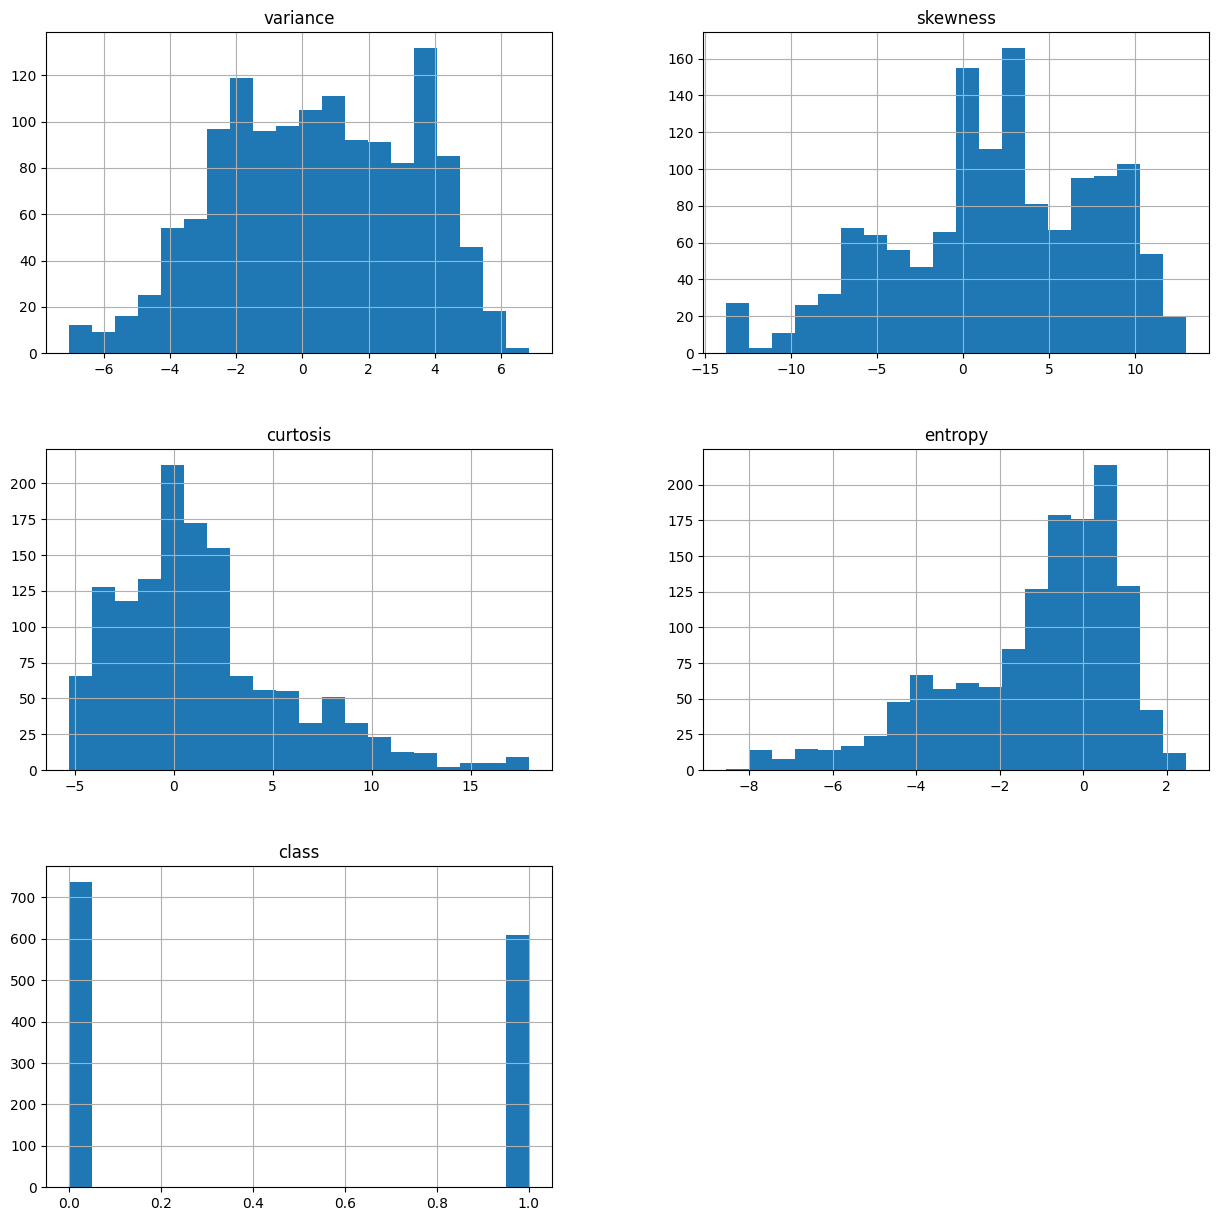

In [19]:
from matplotlib import pyplot as plt
df.hist(bins=20, figsize=(15, 15))
plt.show()

<Axes: >

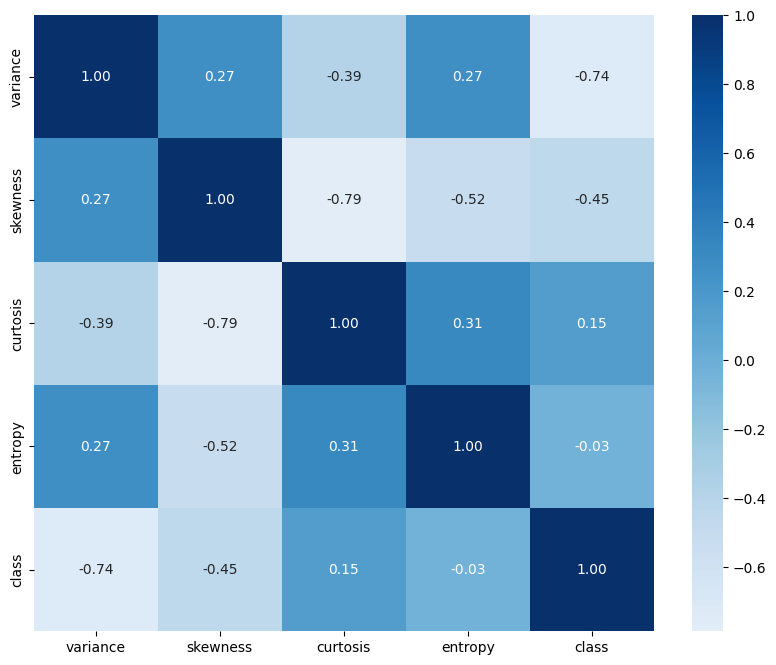

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues", center=0)

**note: variance is the most correlated feature with class**

In [21]:

# Sample data: 100 points for two features and binary classes
# np.random.seed(0)
# x_class0 = np.random.normal(loc=0.0, scale=1.0, size=(50, 2))  # Class -1
# x_class1 = np.random.normal(loc=2.0, scale=1.0, size=(50, 2))  # Class 1

# x = np.vstack((x_class0, x_class1))   # Shape: (100, 2)
# y = np.array([-1]*50 + [1]*50)        # Class labels

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='Class 0', alpha=0.6)
# plt.scatter(x[y == 1, 0], x[y == 1, 1], color='blue', label='Class 1', alpha=0.6)

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('Class Distribution')
# plt.legend()
# plt.grid(True)
# plt.show()


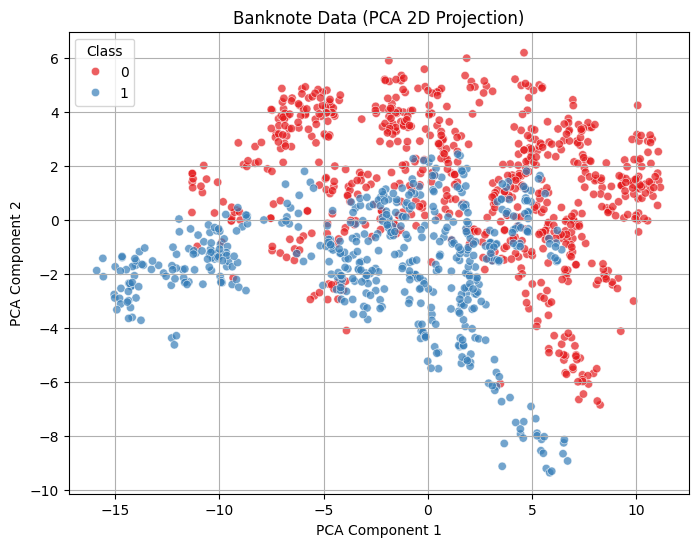

In [22]:
# Visualize the data in 2D using PCA to help select a suitable kernel
import seaborn as sns
# Reduce features to 2D for visualization
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x_clean)
# Plot the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_2d[:, 0], y=x_2d[:, 1], hue=y_clean.values, palette='Set1', alpha=0.7)
plt.title("Banknote Data (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Class")
plt.grid(True)
plt.show()

# Interpretation tip:
# - If the classes are well separated by a straight line, 'linear' kernel is suitable.
# - If the classes are mixed or have curved boundaries, try 'rbf' or 'poly' kernels.

**Kernel (rbf) has the best accuracy**

## Data preprocessing

In [23]:
x = x_clean.values
y = y_clean.values

In [24]:
x

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645],
       ...,
       [ 0.40614,  1.3492 , -1.4501 , -0.55949],
       [-1.3887 , -4.8773 ,  6.4774 ,  0.34179],
       [-2.5419 , -0.65804,  2.6842 ,  1.1952 ]])

In [25]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [26]:
# Convert labels from {0,1} to {-1, +1} for SVM
y = np.where(y == 0, -1, 1)
y = y.reshape(-1)          # OR
y

array([-1, -1, -1, ...,  1,  1,  1])

### **Train, test, validation split**

In [27]:

# Shuffle and split the data
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42, shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Print the sizes of the splits
print(f"Training data size: {len(x_train)}")
print(f"Validation data size: {len(x_val)}")
print(f"Test data size: {len(x_test)}")

Training data size: 755
Validation data size: 252
Test data size: 252


### **Standrization**

In [28]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
x_train = scaler.fit_transform(x_train)

# Use the same scaler to transform validation and test sets
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [29]:
x_train[0:5], y_train[0:5]

(array([[ 0.01488294,  0.04193256,  1.07750917,  0.80207146],
        [-1.11318307, -0.41671226,  0.26029809,  1.09997708],
        [-0.43415016, -0.41515134, -0.33073158,  1.05258231],
        [ 1.39591576, -0.41007717,  0.28996591,  1.09799382],
        [-1.27480816, -0.02559731, -0.38722131, -0.55187305]]),
 array([-1,  1,  1, -1,  1]))


Kernel: linear
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       157
           1       0.99      1.00      0.99        95

    accuracy                           1.00       252
   macro avg       0.99      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

Accuracy: 0.9960


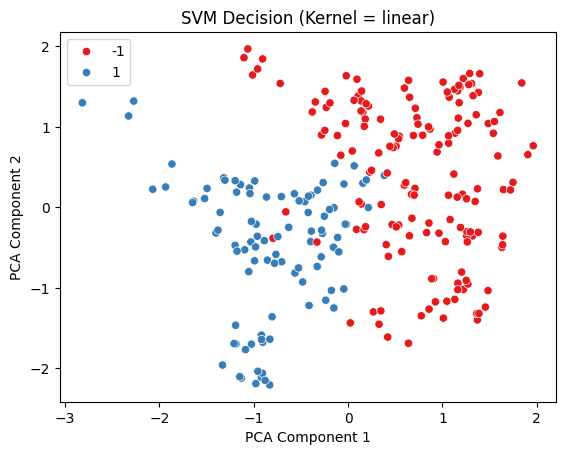


Kernel: rbf
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       157
           1       1.00      1.00      1.00        95

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

Accuracy: 1.0000


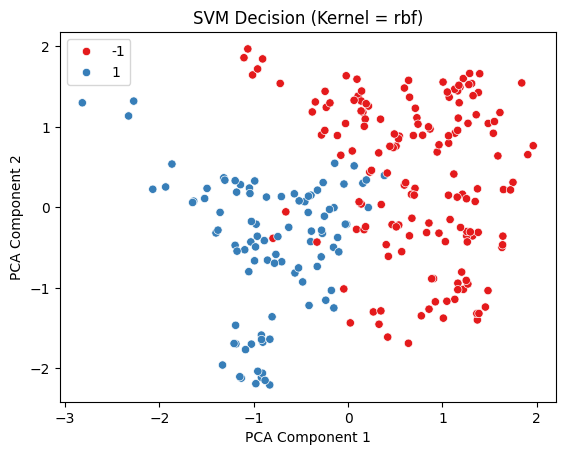


Kernel: poly
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       157
           1       0.99      1.00      0.99        95

    accuracy                           1.00       252
   macro avg       0.99      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252

Accuracy: 0.9960


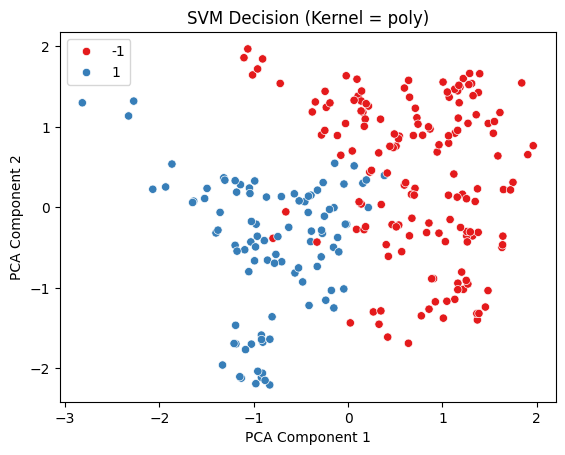


Kernel: sigmoid
              precision    recall  f1-score   support

          -1       0.89      0.92      0.91       157
           1       0.86      0.82      0.84        95

    accuracy                           0.88       252
   macro avg       0.88      0.87      0.87       252
weighted avg       0.88      0.88      0.88       252

Accuracy: 0.8810


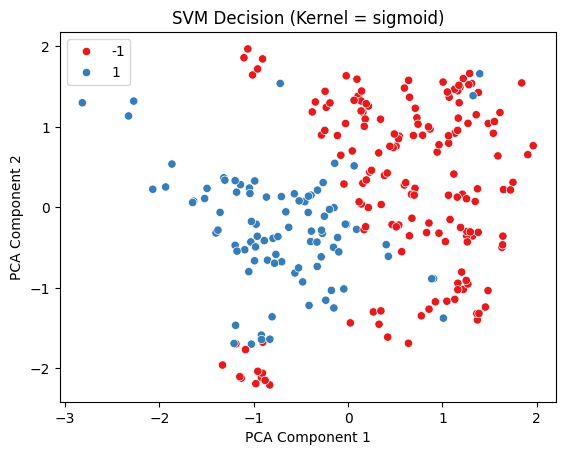

In [30]:
# Try different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_val)
    
    print(f"\nKernel: {kernel}")
    print(classification_report(y_val, y_pred))
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    
    # Visualization
    plt.figure()
    sns.scatterplot(x=x_val[:, 0], y=x_val[:, 1], hue=y_pred, palette='Set1')
    plt.title(f"SVM Decision (Kernel = {kernel})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


## SVM (support vector machine) model from scratch 

In [53]:
class KernelSVM:
    """
    Support Vector Machine (SVM) classifier with kernel support and custom optimizers.

    Parameters
    ----------
    kernel : str, default='linear'
        Kernel type to be used in the algorithm. Must be one of 'linear', 'poly', or 'rbf'.
    C : float, default=1.0
        Regularization parameter. The strength of the regularization is inversely proportional to C.
    gamma : float, default=1.0
        Kernel coefficient for 'rbf' and 'poly' kernels.
    degree : int, default=3
        Degree of the polynomial kernel function ('poly').
    coef0 : float, default=1.0
        Independent term in kernel function. It is only significant in 'poly' kernel.
    optimizer : str, default='subgradient'
        Optimization method to use. Options: 'subgradient', 'gradient'.
    max_iter : int, default=1000
        Maximum number of iterations for the optimizer.
    lr : float, default=0.001
        Learning rate for the optimizer.
    delta : float, default=1.0
        Delta parameter for smooth hinge loss (used in 'gradient' optimizer).

    Attributes
    ----------
    alphas : np.ndarray
        Lagrange multipliers for support vectors.
    support_vectors : np.ndarray
        Support vectors found during training.
    support_vector_labels : np.ndarray
        Labels of the support vectors.
    b : float
        Bias term.
    X : np.ndarray
        Training data.
    y : np.ndarray
        Training labels.

    Methods
    -------
    fit(X, y, x_val=None, y_val=None, x_test=None, y_test=None)
        Fit the SVM model according to the given training data.
    project(X)
        Calculate the decision function values for samples in X.
    predict(X)
        Perform classification on samples in X.

    Examples
    --------
    >>> svm = KernelSVM(kernel='rbf', C=1.0, gamma=0.5)
    >>> svm.fit(X_train, y_train)
    >>> y_pred = svm.predict(X_test)
    """

    def __init__(self, kernel='linear', C=1.0, gamma=1.0, degree=3, coef0=1.0,
                 optimizer='subgradient', max_iter=1000, lr=0.001, delta=1.0):
        """
        Initialize the KernelSVM classifier with specified hyperparameters.
        """
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.degree = degree
        self.coef0 = coef0
        self.optimizer = optimizer  # 'subgradient', 'gradient'
        self.max_iter = max_iter
        self.lr = lr
        self.delta = delta

    def _kernel_function(self, x, y):
        """
        Compute the kernel function between two samples.

        Parameters
        ----------
        x : np.ndarray
            First sample.
        y : np.ndarray
            Second sample.

        Returns
        -------
        float
            Kernel value.
        """
        if self.kernel == 'linear':
            return np.dot(x, y)
        elif self.kernel == 'poly':
            return (self.gamma * np.dot(x, y) + self.coef0) ** self.degree
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.linalg.norm(x - y) ** 2)
        else:
            raise ValueError("Unsupported kernel")

    def _compute_kernel_matrix(self, X):
        """
        Compute the kernel matrix for the dataset X.

        Parameters
        ----------
        X : np.ndarray
            Input data of shape (n_samples, n_features).

        Returns
        -------
        K : np.ndarray
            Kernel matrix of shape (n_samples, n_samples).
        """
        n_samples = X.shape[0]
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self._kernel_function(X[i], X[j])
        return K

    def fit(self, X, y, x_val=None, y_val=None, x_test=None, y_test=None):
        """
        Fit the SVM model according to the given training data.

        Parameters
        ----------
        X : np.ndarray
            Training data of shape (n_samples, n_features).
        y : np.ndarray
            Target labels of shape (n_samples,).
        x_val : np.ndarray, optional
            Validation data.
        y_val : np.ndarray, optional
            Validation labels.
        x_test : np.ndarray, optional
            Test data.
        y_test : np.ndarray, optional
            Test labels.

        Returns
        -------
        results : list of tuples
            List of (metric_name, value) for train/val/test accuracy and hinge loss, if validation/test data is provided.
        """
        self.X = X
        self.y = y
        n_samples = X.shape[0]

        K = self._compute_kernel_matrix(X)

        if self.optimizer == 'subgradient':
            alphas = np.zeros(n_samples)
            for _ in range(self.max_iter):
                for i in range(n_samples):
                    margin = y[i] * np.sum(alphas * y * K[:, i])
                    if margin < 1:
                        alphas[i] += self.lr * (1 - margin)
                    else:
                        alphas[i] -= self.lr * self.C * alphas[i]  # regularization

        elif self.optimizer == 'gradient':
            alphas = np.random.rand(n_samples)
            for _ in range(self.max_iter):
                margins = y * (K @ (alphas * y))
                # Use delta for smooth hinge loss if desired
                gradients = np.where(
                    margins >= self.delta,
                    self.C * alphas,
                    np.where(
                        margins > 0,
                        self.C * alphas - y * (self.delta - margins) / self.delta,
                        self.C * alphas - y
                    )
                )
                alphas -= self.lr * gradients

        else:
            raise ValueError("Invalid optimizer. Choose from 'subgradient', or 'gradient'.")

        sv = alphas > 1e-5
        self.alphas = alphas[sv]
        self.support_vectors = X[sv]
        self.support_vector_labels = y[sv]

        # Calculate bias term using only support vectors
        if len(self.alphas) == 0:
            self.b = 0
        else:
            self.b = 0
            for i in range(len(self.alphas)):
                self.b += self.support_vector_labels[i]
                self.b -= np.sum(self.alphas * self.support_vector_labels * 
                                 [self._kernel_function(self.support_vectors[i], sv) for sv in self.support_vectors])
            self.b /= len(self.alphas)

        # Optionally evaluate on validation and test sets if provided
        results = []
        # Compute training accuracy and hinge loss
        y_train_pred = self.predict(X)
        train_acc = np.mean(y_train_pred == y)
        train_margins = y * self.project(X)
        train_hinge_loss = np.mean(np.maximum(0, 1 - train_margins))
        results.append(('train_acc', train_acc))
        results.append(('train_hinge_loss', train_hinge_loss))

        if x_val is not None and y_val is not None:
            y_val_pred = self.predict(x_val)
            val_acc = np.mean(y_val_pred == y_val)
            val_margins = y_val * self.project(x_val)
            val_hinge_loss = np.mean(np.maximum(0, 1 - val_margins))
            results.append(('val_acc', val_acc))
            results.append(('val_hinge_loss', val_hinge_loss))

        if x_test is not None and y_test is not None:
            y_test_pred = self.predict(x_test)
            test_acc = np.mean(y_test_pred == y_test)
            test_margins = y_test * self.project(x_test)
            test_hinge_loss = np.mean(np.maximum(0, 1 - test_margins))
            results.append(('test_acc', test_acc))
            results.append(('test_hinge_loss', test_hinge_loss))

        if results:
            return results

    def project(self, X):
        """
        Calculate the decision function values for samples in X.

        Parameters
        ----------
        X : np.ndarray
            Input data of shape (n_samples, n_features).

        Returns
        -------
        y_pred : np.ndarray
            Decision function values for each sample.
        """
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            result = 0
            for alpha, sv_y, sv in zip(self.alphas, self.support_vector_labels, self.support_vectors):
                result += alpha * sv_y * self._kernel_function(X[i], sv)
            y_pred[i] = result
        return y_pred + self.b

    def predict(self, X):
        """
        Perform classification on samples in X.

        Parameters
        ----------
        X : np.ndarray
            Input data of shape (n_samples, n_features).

        Returns
        -------
        y_pred : np.ndarray
            Predicted class labels for each sample.
        """
        return np.sign(self.project(X))


In [54]:
# Example using subgradient
svm = KernelSVM(kernel='linear', C=1.0, optimizer='subgradient', max_iter=500)
svm.fit(x_train, y_train)
predictions = svm.predict(x_val)
print(f"Accuracy: {np.mean(predictions == y_val):.4f}")

Accuracy: 0.9960


In [55]:
# Example using subgradient
svm = KernelSVM(kernel='poly', C=1.0, degree=3, optimizer='subgradient', max_iter=500)
svm.fit(x_train, y_train)
predictions = svm.predict(x_val)
print(f"Accuracy: {np.mean(predictions == y_val):.4f}")

Accuracy: 1.0000


In [56]:
# Example using subgradient
svm = KernelSVM(kernel='rbf', C=1.0, gamma=0.5, optimizer='subgradient', max_iter=500)
svm.fit(x_train, y_train)
predictions = svm.predict(x_val)
print(f"Accuracy: {np.mean(predictions == y_val):.4f}")

Accuracy: 1.0000


## Training on 500 epochs with subgradient

In [ ]:
# Train with subgradient optimizer
for epoch in range(50):
    svm_sub = KernelSVM(kernel='rbf', optimizer='subgradient', max_iter=epoch, lr=0.01)
    train_accuracies_sub, train_losses_sub, val_accuracies_sub, val_losses_sub= svm_sub.fit(x_train, y_train, x_val, y_val)
    train_losses_sub = pd.Series(train_losses_sub)
    train_accuracies_sub = pd.Series(train_accuracies_sub)
    val_accuracies_sub = pd.Series(val_accuracies_sub)
    val_losses_sub = pd.Series(val_losses_sub)
    print(f"Epoch {epoch}: Train Loss: {train_losses_sub[1]}, Train Accuracy: {train_accuracies_sub[1]}, Validation Accuracy: {val_accuracies_sub[1]}, Validation Loss: {val_losses_sub[1]}")



('train_acc', np.float64(1.0))


**after 500 epochs, train loss decrased from 0.71 to 0.03**

**also, validation loss decreased from 0.4 to 0.04**

**train accuarcy increased from 85% to 98%**

**validation accuarcy increased from 87% to 94%**


In [39]:
# Train with subgradient optimizer
for epoch in range(50):
    svm_grad = KernelSVM(kernel='rbf', optimizer='gradient', max_iter=epoch, lr=0.01)
    train_accuracies_grad, train_losses_grad, val_accuracies_grad, val_losses_grad= svm_grad.fit(x_train, y_train, x_val, y_val)
    train_losses_grad = pd.Series(train_losses_grad)
    train_accuracies_grad = pd.Series(train_accuracies_grad)
    val_accuracies_grad = pd.Series(val_accuracies_grad)
    val_losses_grad = pd.Series(val_losses_grad)
    print(f"Epoch {epoch}: Train Loss: {train_losses_grad[1]}, Train Accuracy: {train_accuracies_grad[1]}, Validation Accuracy: {val_accuracies_grad[1]}, Validation Loss: {val_losses_grad[1]}")



Epoch 0: Train Loss: 0.09423150779300865, Train Accuracy: 0.9801324503311258, Validation Accuracy: 0.9801587301587301, Validation Loss: 0.031109674483735826
Epoch 1: Train Loss: 0.10137118211262582, Train Accuracy: 0.9827814569536424, Validation Accuracy: 0.9841269841269841, Validation Loss: 0.031126341152881567
Epoch 2: Train Loss: 0.09337419919472294, Train Accuracy: 0.9801324503311258, Validation Accuracy: 0.9880952380952381, Validation Loss: 0.021263265942524152
Epoch 3: Train Loss: 0.11306302720509702, Train Accuracy: 0.9788079470198675, Validation Accuracy: 0.9801587301587301, Validation Loss: 0.05016186974432598
Epoch 4: Train Loss: 0.09720666589521985, Train Accuracy: 0.9814569536423841, Validation Accuracy: 0.9920634920634921, Validation Loss: 0.025986584138739218
Epoch 5: Train Loss: 0.09530522109322777, Train Accuracy: 0.9814569536423841, Validation Accuracy: 0.9841269841269841, Validation Loss: 0.02476086722160727
Epoch 6: Train Loss: 0.12307852910322063, Train Accuracy: 0.

KeyboardInterrupt: 

### Loss curve for train & validation with subgradient optimizer 

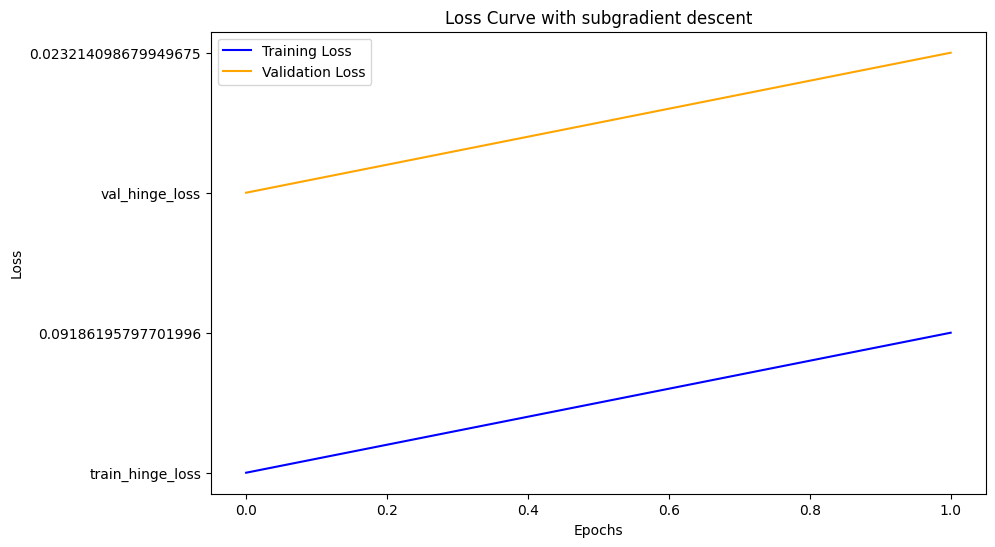

In [ ]:

# Plot the loss curve
# make train_losses_sub instance of str or bytes
# convert series values to string

plt.figure(figsize=(10, 6))
plt.plot(train_losses_sub, label='Training Loss', color='blue')
if val_accuracies_sub is not None:
    plt.plot(val_losses_sub, label='Validation Loss', color='orange')

plt.title('Loss Curve with subgradient descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Accuarcy curve for train & validation with subgradient optimizer 

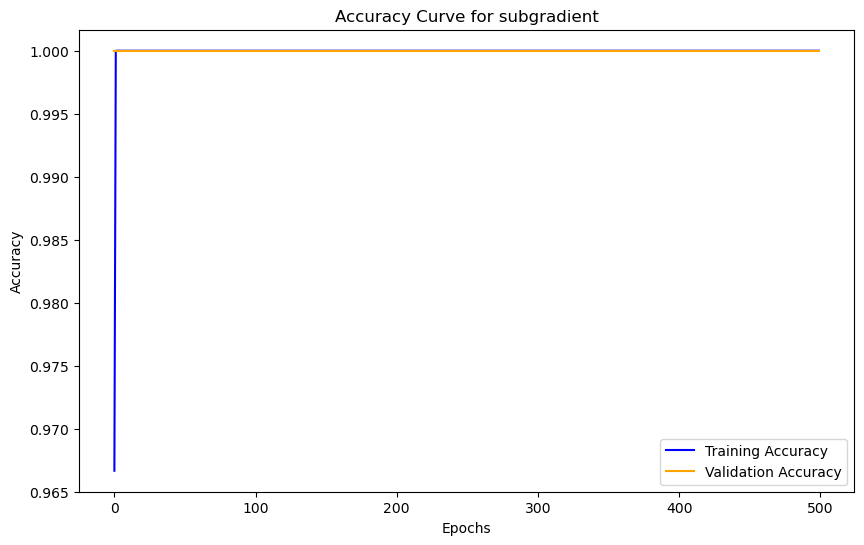

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_sub, label='Training Accuracy', color='blue')
if val_accuracies_sub is not None:
    plt.plot(val_accuracies_sub, label='Validation Accuracy', color='orange')

plt.title('Accuracy Curve for subgradient')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Training 500 epoch with gradient decsent

**notice here the loss in both train and validation increses which indicate subgradient is better to use**

### Loss curve for train & validation with gradient optimizer 

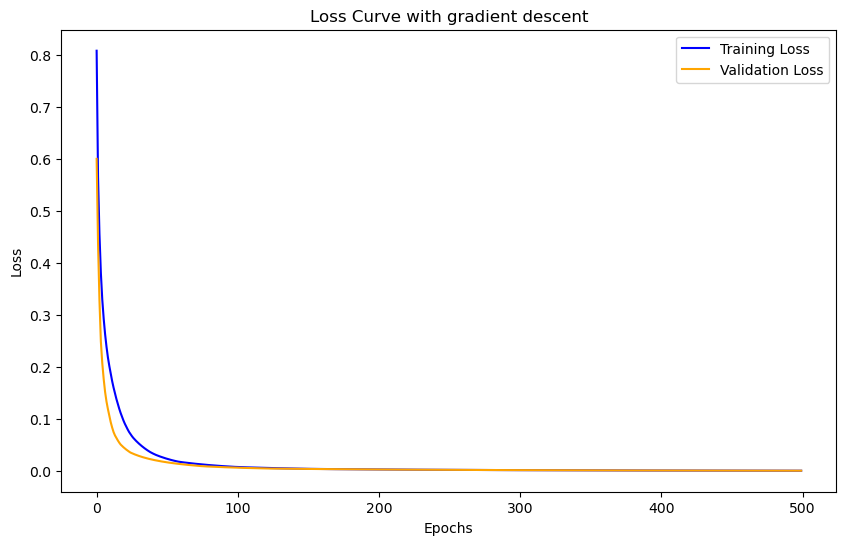

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_losses_grad, label='Training Loss', color='blue')
if val_accuracies_grad is not None:
    plt.plot(val_losses_grad, label='Validation Loss', color='orange')

plt.title('Loss Curve with gradient descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

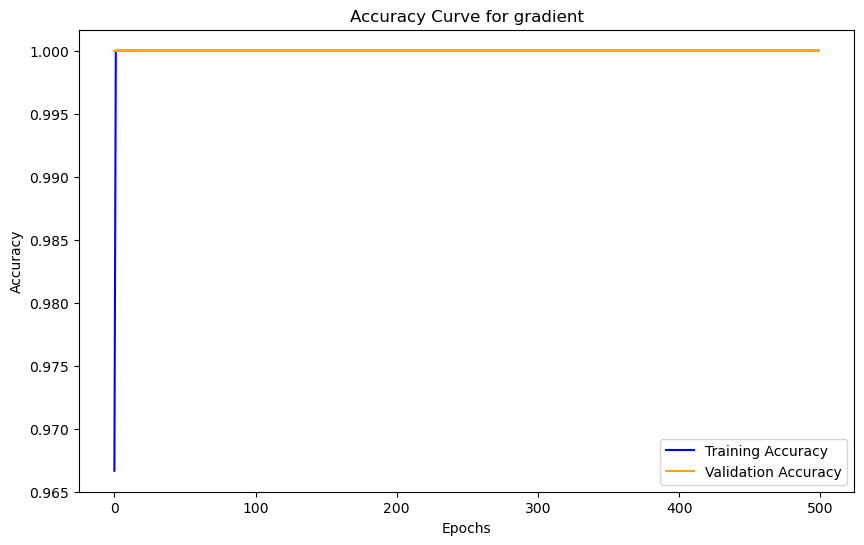

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_grad, label='Training Accuracy', color='blue')
if val_accuracies_grad is not None:
    plt.plot(val_accuracies_grad, label='Validation Accuracy', color='orange')

plt.title('Accuracy Curve for gradient')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## model testing with subgradient

In [ ]:
svm_subgradient = KernelSVM()

# Train the model
train_losses_sub, train_accuracies_sub, val_accuracies_sub, val_losses_sub,test_accuracies_sub, test_losses_sub= svm_subgradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_subgradient.max_iter):
    test_loss_sub = test_losses_sub[epoch]
    test_acc_sub = test_accuracies_sub[epoch]
    
    print(f"Epoch {epoch+1} | test_Loss: {test_loss_sub:.4f} | Test Acc: {test_acc_sub:.4f} ")



Epoch 1 | test_Loss: 0.9385 | Test Acc: 1.0000 
Epoch 2 | test_Loss: 0.8771 | Test Acc: 1.0000 
Epoch 3 | test_Loss: 0.8156 | Test Acc: 1.0000 
Epoch 4 | test_Loss: 0.7542 | Test Acc: 1.0000 
Epoch 5 | test_Loss: 0.6927 | Test Acc: 1.0000 
Epoch 6 | test_Loss: 0.6313 | Test Acc: 1.0000 
Epoch 7 | test_Loss: 0.5698 | Test Acc: 1.0000 
Epoch 8 | test_Loss: 0.5084 | Test Acc: 1.0000 
Epoch 9 | test_Loss: 0.4469 | Test Acc: 1.0000 
Epoch 10 | test_Loss: 0.3855 | Test Acc: 1.0000 
Epoch 11 | test_Loss: 0.3240 | Test Acc: 1.0000 
Epoch 12 | test_Loss: 0.2626 | Test Acc: 1.0000 
Epoch 13 | test_Loss: 0.2011 | Test Acc: 1.0000 
Epoch 14 | test_Loss: 0.1397 | Test Acc: 1.0000 
Epoch 15 | test_Loss: 0.0782 | Test Acc: 1.0000 
Epoch 16 | test_Loss: 0.0303 | Test Acc: 1.0000 
Epoch 17 | test_Loss: 0.0099 | Test Acc: 1.0000 
Epoch 18 | test_Loss: 0.0052 | Test Acc: 1.0000 
Epoch 19 | test_Loss: 0.0043 | Test Acc: 1.0000 
Epoch 20 | test_Loss: 0.0043 | Test Acc: 1.0000 
Epoch 21 | test_Loss: 0.0043 

**with subgradient, test loss decreased to 0.02**

## Model testing with gradient

In [ ]:
svm_gradient = KernelSVM()

# Train the model
train_losses_grad, train_accuracies_grad, val_accuracies_grad, val_losses_grad,test_accuracies_grad, test_losses_grad= svm_gradient.fit(x_train, y_train, x_val, y_val, x_test, y_test) 

# Print the epoch-wise info
for epoch in range(svm_gradient.max_iter):
    test_acc_grad = test_accuracies_grad[epoch]
    test_loss_grad = test_losses_grad[epoch]

    
    print(f"Epoch {epoch+1} | test_Loss: {test_loss_grad:.4f} | Test Acc: {test_acc_grad:.4f} ")



Epoch 1 | test_Loss: 0.9385 | Test Acc: 1.0000 
Epoch 2 | test_Loss: 0.8771 | Test Acc: 1.0000 
Epoch 3 | test_Loss: 0.8156 | Test Acc: 1.0000 
Epoch 4 | test_Loss: 0.7542 | Test Acc: 1.0000 
Epoch 5 | test_Loss: 0.6927 | Test Acc: 1.0000 
Epoch 6 | test_Loss: 0.6313 | Test Acc: 1.0000 
Epoch 7 | test_Loss: 0.5698 | Test Acc: 1.0000 
Epoch 8 | test_Loss: 0.5084 | Test Acc: 1.0000 
Epoch 9 | test_Loss: 0.4469 | Test Acc: 1.0000 
Epoch 10 | test_Loss: 0.3855 | Test Acc: 1.0000 
Epoch 11 | test_Loss: 0.3240 | Test Acc: 1.0000 
Epoch 12 | test_Loss: 0.2626 | Test Acc: 1.0000 
Epoch 13 | test_Loss: 0.2011 | Test Acc: 1.0000 
Epoch 14 | test_Loss: 0.1397 | Test Acc: 1.0000 
Epoch 15 | test_Loss: 0.0782 | Test Acc: 1.0000 
Epoch 16 | test_Loss: 0.0303 | Test Acc: 1.0000 
Epoch 17 | test_Loss: 0.0099 | Test Acc: 1.0000 
Epoch 18 | test_Loss: 0.0052 | Test Acc: 1.0000 
Epoch 19 | test_Loss: 0.0043 | Test Acc: 1.0000 
Epoch 20 | test_Loss: 0.0043 | Test Acc: 1.0000 
Epoch 21 | test_Loss: 0.0043 

**test loss increases when using gradient descent as an optimizer**

## loss comparasion between train & test and validation while using subgradient and gradient

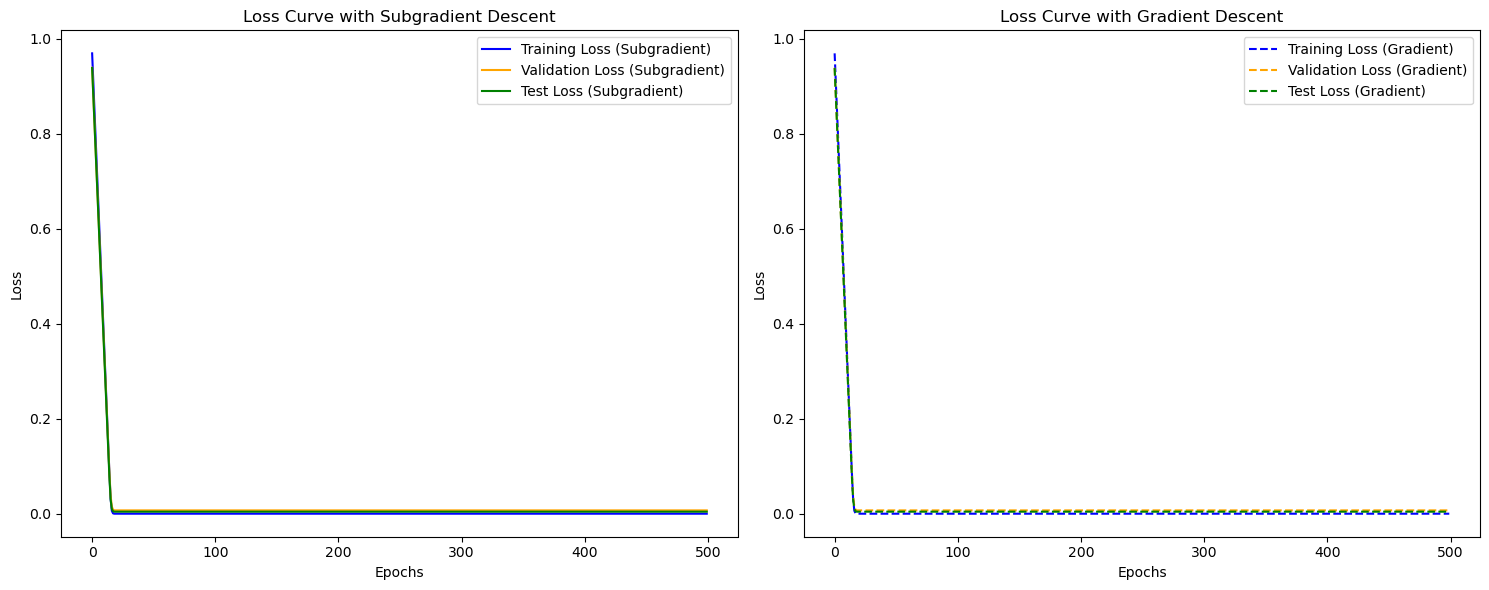

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the loss curve for Subgradient
ax1.plot(train_losses_sub, label='Training Loss (Subgradient)', color='blue')
ax1.plot(val_losses_sub, label='Validation Loss (Subgradient)', color='orange')
ax1.plot(test_losses_sub, label='Test Loss (Subgradient)', color='green')
ax1.set_title('Loss Curve with Subgradient Descent')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the loss curve for Gradient
ax2.plot(train_losses_grad, label='Training Loss (Gradient)', color='blue', linestyle='--')
ax2.plot(val_losses_grad, label='Validation Loss (Gradient)', color='orange', linestyle='--')
ax2.plot(test_losses_grad, label='Test Loss (Gradient)', color='green', linestyle='--')
ax2.set_title('Loss Curve with Gradient Descent')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Show the figure
plt.tight_layout()
plt.show()

## loss comparasion between train & test and validation while using subgradient and gradient

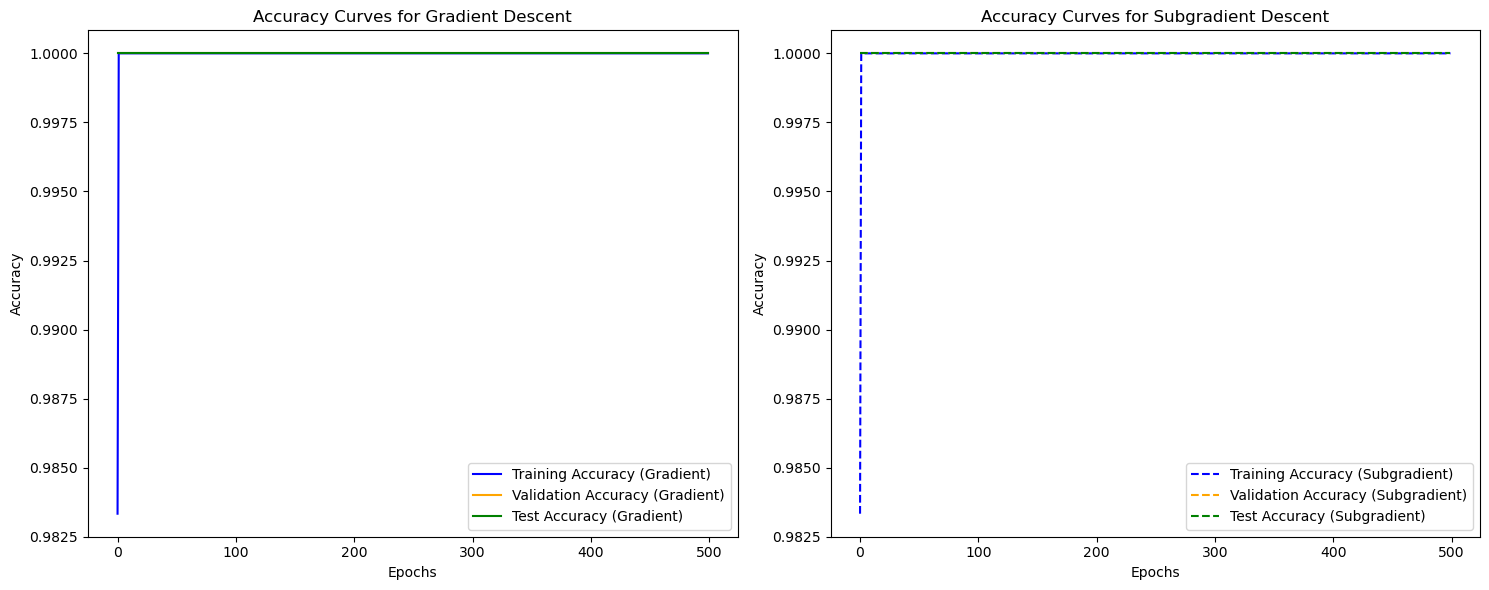

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the accuracy curves for Gradient Descent
ax1.plot(train_accuracies_grad, label='Training Accuracy (Gradient)', color='blue', linestyle='-')
ax1.plot(val_accuracies_grad, label='Validation Accuracy (Gradient)', color='orange', linestyle='-')
ax1.plot(test_accuracies_grad, label='Test Accuracy (Gradient)', color='green', linestyle='-')
ax1.set_title('Accuracy Curves for Gradient Descent')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the accuracy curves for Subgradient Descent
ax2.plot(train_accuracies_sub, label='Training Accuracy (Subgradient)', color='blue', linestyle='--')
ax2.plot(val_accuracies_sub, label='Validation Accuracy (Subgradient)', color='orange', linestyle='--')
ax2.plot(test_accuracies_sub, label='Test Accuracy (Subgradient)', color='green', linestyle='--')
ax2.set_title('Accuracy Curves for Subgradient Descent')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout and show the figure
plt.tight_layout()
plt.show()


## Confusion matrix 

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


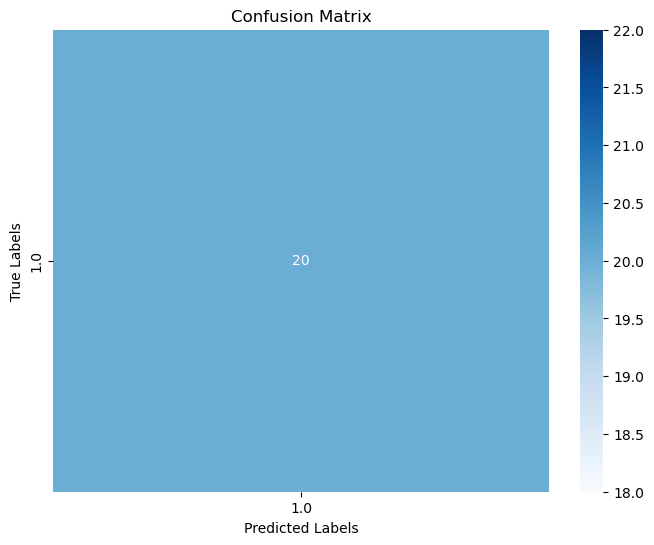

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict and compute the confusion matrix
y_pred = svm_subgradient.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Initialize confusion matrix values
true_positive = sum((y_test == 1) & (svm_subgradient.predict(x_test) == 1))
false_positive = sum((y_test == -1) & (svm_subgradient.predict(x_test) == 1))
false_negative = sum((y_test == 1) & (svm_subgradient.predict(x_test) == -1))

# Calculate precision and recall
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 1.0000
Recall: 1.0000


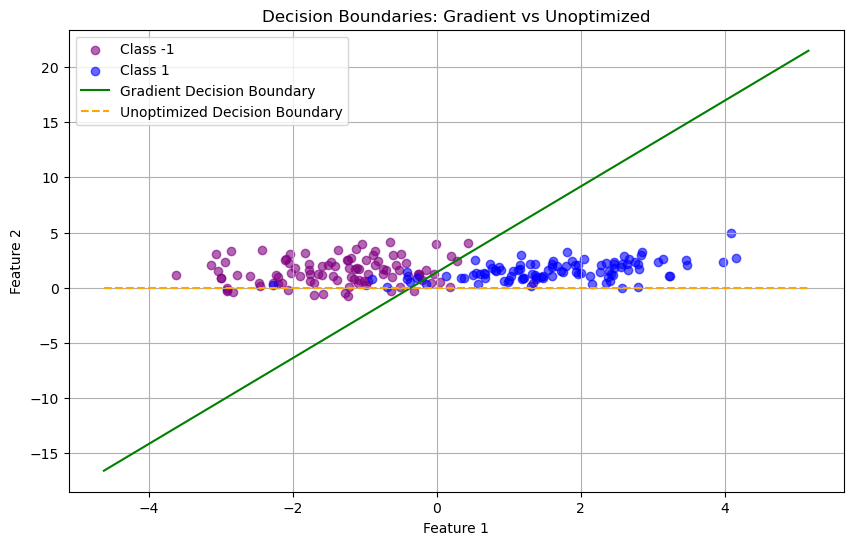

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic binary classification data
x, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1.5, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1 for visualization

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train Linear SVM (Gradient Optimizer simulation)
svm_gradient = LinearSVC(C=1.0, max_iter=1000)
svm_gradient.fit(x_train, y_train)

# Extract weights and bias for gradient optimizer
w_grad = svm_gradient.coef_[0]
b_grad = svm_gradient.intercept_[0]

# Extract weights and bias for the unoptimized model (assuming initial weights are zeros)
w_unoptimized = np.zeros_like(w_grad)
b_unoptimized = 0

# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0][y == -1], x[:, 1][y == -1], color='purple', label='Class -1', alpha=0.6)
plt.scatter(x[:, 0][y == 1], x[:, 1][y == 1], color='blue', label='Class 1', alpha=0.6)

# Plot decision boundaries
x1 = np.linspace(x[:, 0].min() - 1, x[:, 0].max() + 1, 200)

# Gradient optimizer boundary
x2_grad = -(w_grad[0] * x1 + b_grad) / w_grad[1]
plt.plot(x1, x2_grad, color='green', label='Gradient Decision Boundary')

# Unoptimized boundary
x2_unoptimized = -(w_unoptimized[0] * x1 + b_unoptimized) / (w_unoptimized[1] + 1e-10)  # Avoid div by zero
plt.plot(x1, x2_unoptimized, color='orange', label='Unoptimized Decision Boundary', linestyle='--')

# Labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries: Gradient vs Unoptimized')
plt.legend()
plt.grid(True)
plt.show()
